In [1]:
import pandas as pd
data = pd.read_csv("/Users/gurnoorvirdi/Desktop/NLP- social sciences/NLP Final Project/covid19_tweets.csv")

In [2]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [3]:
import sys
sys.path
sys.executable
sys.path.insert(0, r"/Users/gurnoorvirdi/anaconda3/lib/python3.11/site-packages")

In [4]:
import nltk
from nrclex import NRCLex
import re

text = data['text']

# Word Tokenization
tokens_list = text.apply(nltk.word_tokenize)

# Get rid of symbols and special characters from each tweet
def remove_special_characters(tokens):
    # Regular expression pattern to match any non-alphanumeric character (including underscores)
    pattern = r'[^a-zA-Z0-9\s]'
    # Remove special characters and symbols using the pattern
    tokens = [re.sub(pattern, '', token) for token in tokens]
    # Remove any empty tokens
    tokens = [token for token in tokens if token]
    return tokens

# Apply the remove_special_characters function to each list of tokens
tokens_list_cleaned = tokens_list.apply(remove_special_characters)
tokens_list_cleaned


0         [If, I, smelled, the, scent, of, hand, sanitiz...
1         [Hey, Yankees, YankeesPR, and, MLB, would, nt,...
2         [diane3443, wdunlap, realDonaldTrump, Trump, n...
3         [brookbanktv, The, one, gift, COVID19, has, gi...
4         [25, July, Media, Bulletin, on, Novel, CoronaV...
                                ...                        
179103    [Thanks, IamOhmai, for, nominating, me, for, t...
179104    [2020, The, year, of, insanity, Lol, COVID19, ...
179105    [CTVNews, A, powerful, painting, by, Juan, Luc...
179106    [More, than, 1200, students, test, positive, f...
179107    [I, stop, when, I, see, a, Stop, SABCNews, Izi...
Name: text, Length: 179108, dtype: object

In [5]:
# Sentiment Analysis with NRC
from nrclex import NRCLex

def get_sentiment_score(tokens):
    text = " ".join(tokens)
    return NRCLex(text).affect_frequencies

# Apply the get_sentiment_score function to each list of tokens
sentiment_scores = tokens_list_cleaned.apply(get_sentiment_score)
sentiment_scores

0         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
1         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
2         {'fear': 0.0, 'anger': 0.16666666666666666, 'a...
3         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
4         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
                                ...                        
179103    {'fear': 0.3333333333333333, 'anger': 0.333333...
179104    {'fear': 0.2, 'anger': 0.2, 'anticip': 0.0, 't...
179105    {'fear': 0.125, 'anger': 0.125, 'anticip': 0.0...
179106    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
179107    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
Name: text, Length: 179108, dtype: object

In [6]:
import nltk
from nrclex import NRCLex
import re
import pandas as pd

text = data['text']

# Word Tokenization
tokens_list = text.apply(nltk.word_tokenize)

# Get rid of symbols and special characters from each tweet
def remove_special_characters(tokens):
    pattern = r'[^a-zA-Z0-9\s]'
    tokens = [re.sub(pattern, '', token) for token in tokens]
    tokens = [token for token in tokens if token]
    return tokens

# Apply the remove_special_characters function to each list of tokens
tokens_list_cleaned = tokens_list.apply(remove_special_characters)

# Sentiment Analysis using NRC Lexicon
def get_sentiment_score(tokens):
    text = " ".join(tokens)
    return NRCLex(text).affect_frequencies

# Apply the get_sentiment_score function to each list of tokens
sentiment_scores = tokens_list_cleaned.apply(get_sentiment_score)

# Create a new DataFrame for sentiment analysis results
sentiment_df = pd.DataFrame(sentiment_scores.tolist(), index=data.index)

# Combine the new DataFrame with the original data
data_with_sentiment = pd.concat([data, sentiment_df], axis=1)

# Display the data with sentiment analysis results
print(data_with_sentiment.head())


         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3   

In [7]:
#first check how the Location is structured and if we can classify the data by States/ countries 

print(data_with_sentiment['user_location'])

# Fill NaN values with 0 before performing aggregation
data_with_sentiment.fillna(0, inplace=True)

0                         astroworld
1                       New York, NY
2                   Pewee Valley, KY
3               Stuck in the Middle 
4                  Jammu and Kashmir
                     ...            
179103               Ilorin, Nigeria
179104                       Ontario
179105                     🇨🇦 Canada
179106                 New York City
179107    Aliwal North, South Africa
Name: user_location, Length: 179108, dtype: object


In [8]:
# Display the data with sentiment analysis results
print(data_with_sentiment.head())

         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3   

In [9]:
# create a dataframe that aggregates and takes the mean of all the locations 
sentiment_aggregated_df = data_with_sentiment.groupby('user_location', as_index=False).agg({
    'anger': 'mean',
    'anticip': 'mean',
    'trust': 'mean',
    'surprise': 'mean',
    'positive': 'mean',
    'negative': 'mean',
    'sadness': 'mean',
    'disgust': 'mean',
    'joy': 'mean',
    'anticipation': 'mean',
})

In [10]:
sentiment_aggregated_df['user_location']

0                          0
1             \nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤
2                           
3             Cathlamet, Wa.
4               Canada 🇨🇦🍁🛶🌲
                ...         
26916                      🦄
26917            🦄🌈❤️🧡💛💚💙💜🌈🦄
26918                 🦅💛💛💙❤🌋
26919              🦠Grounded
26920                      🪐
Name: user_location, Length: 26921, dtype: object

In [11]:
# Check if the argument contains only letters using regex
def contains_only_letters(s):
    return bool(re.match(r'^[a-zA-Z\s]+$', str(s)))

# Filter rows and take out locations with numbers and emojis - clean
filtered_senti_agg_df = sentiment_aggregated_df[sentiment_aggregated_df['user_location'].apply(contains_only_letters)]
print(filtered_senti_agg_df)

                      user_location    anger  anticip     trust  surprise  \
2                                    0.07684      0.0  0.050577  0.030339   
5                         WorldWide  0.00000      0.0  0.000000  0.000000   
8                          Fujairah  0.00000      0.0  0.166667  0.166667   
9        NO investment advice given  0.00000      0.0  0.000000  0.000000   
10              Shropshire England   0.00000      0.0  0.125000  0.083333   
...                             ...      ...      ...       ...       ...   
26114                      your mom  0.00000      0.0  0.000000  0.000000   
26116              your mums house   0.00000      0.0  0.000000  0.000000   
26117                      yourmama  0.25000      0.0  0.000000  0.000000   
26121                           yyc  0.00000      0.0  0.250000  0.000000   
26123                        zagreb  0.00000      0.0  0.250000  0.125000   

       positive  negative   sadness   disgust       joy  anticipation  
2  

In [12]:
# Filter rows based on the condition
us_filtered_df = filtered_senti_agg_df[filtered_senti_agg_df['user_location'].str.contains('Hawaii')]
print(us_filtered_df)

              user_location     anger  anticip     trust  surprise  positive  \
3262   Big Island of Hawaii  0.200000      0.0  0.000000  0.000000  0.000000   
9128                 Hawaii  0.015686      0.0  0.133578  0.073529  0.208088   
9135       Hawaiian Islands  0.000000      0.0  0.000000  0.000000  0.166667   
20422       State of Hawaii  0.000000      0.0  0.333333  0.000000  0.333333   

       negative   sadness   disgust       joy  anticipation  
3262   0.200000  0.200000  0.200000  0.000000      0.000000  
9128   0.128922  0.027451  0.015686  0.073284      0.063480  
9135   0.111111  0.111111  0.000000  0.000000      0.166667  
20422  0.166667  0.000000  0.000000  0.000000      0.166667  


In [13]:
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Create a a filter mask to get rows of that ocntain every state only 
state_mask = filtered_senti_agg_df.apply(lambda row: any(state in row['user_location'] for state in states), axis=1)

us_filtered_df = filtered_senti_agg_df[state_mask]
print(us_filtered_df)


                     user_location     anger  anticip     trust  surprise  \
11       Sunny Southern California  0.053030      0.0  0.075758  0.000000   
24         A Life Long  New Yorker  0.250000      0.0  0.000000  0.000000   
27                         Alabama  0.000000      0.0  0.500000  0.000000   
54          Colorado Plains Native  0.038889      0.0  0.059722  0.045833   
66                         Florida  0.125000      0.0  0.125000  0.000000   
...                            ...       ...      ...       ...       ...   
25412      make Florida BLUE again  0.200000      0.0  0.000000  0.200000   
25545           north central Ohio  0.000000      0.0  0.000000  0.000000   
25634     patch of blue in Florida  0.142857      0.0  0.000000  0.000000   
25770             small town Texas  0.000000      0.0  0.000000  0.000000   
25830          southern California  0.000000      0.0  0.000000  0.000000   

       positive  negative   sadness   disgust       joy  anticipation  
11 

In [14]:
#here we will take the average and create a new DF with 50 rows and average sentiments of rows bys tate 
# Iterate through each state and aggregate scores
import warnings
warnings.filterwarnings('ignore')
agg_us_scores_df = pd.DataFrame(columns=['user_location'] + us_filtered_df.columns[1:].tolist())
for state in states:
    state_rows = us_filtered_df[us_filtered_df['user_location'].str.contains(state, case=False, na=False)]
     
    if not state_rows.empty:
        state_avg_scores = state_rows.mean()
        state_avg_scores['user_location'] = state
        agg_us_scores_df = agg_us_scores_df.append(state_avg_scores, ignore_index=True)

In [15]:
'''
create an overall column that classifies the state as negative or positive:

sum the columns of anger, anticip, negative, sadness, disgust, anticipation for negative 
sum the columns od joy, surprisem, trust, and positive for positive 
check which sum is greater, if negative is greater write negative for column otherwise write positive,
do this for all 50 rows 
'''


'\ncreate an overall column that classifies the state as negative or positive:\n\nsum the columns of anger, anticip, negative, sadness, disgust, anticipation for negative \nsum the columns od joy, surprisem, trust, and positive for positive \ncheck which sum is greater, if negative is greater write negative for column otherwise write positive,\ndo this for all 50 rows \n'

In [16]:
agg_us_scores_df['negative_overall'] = agg_us_scores_df[['anger', 'anticip', 'negative', 'sadness', 'disgust', 'anticipation']].sum(axis=1)
agg_us_scores_df['positive_overall'] = agg_us_scores_df[['trust', 'surprise', 'positive', 'joy']].sum(axis=1)
#Classify rows based on overall sentiment comparison
agg_us_scores_df['overall'] = agg_us_scores_df.apply(lambda row: 'positive' if row['positive_overall'] > row['negative_overall'] else 'negative', axis=1)



In [17]:
'''
Below create a plot of the US map 
plot the strongest sentiment for the state 
Create bar graphs by state and create a bar graph that compares positive to negative 
anger	anticip	trust	surprise	positive	negative	sadness	disgust	joy	anticipation
'''

'\nBelow create a plot of the US map \nplot the strongest sentiment for the state \nCreate bar graphs by state and create a bar graph that compares positive to negative \nanger\tanticip\ttrust\tsurprise\tpositive\tnegative\tsadness\tdisgust\tjoy\tanticipation\n'

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#find the column with the strongest sentiment

# Calculate strongest sentiment for each state
sentiment_columns = ['anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation']
agg_us_scores_df['strongest_sentiment'] = agg_us_scores_df[sentiment_columns].idxmax(axis=1)

agg_us_scores_df

,user_location,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,negative_overall,positive_overall,overall,strongest_sentiment
0,Alabama,0.002670,0.0,0.200302,0.018384,0.188794,0.134620,0.010879,0.036741,0.003611,0.011717,0.196626,0.411090,positive,trust
1,Alaska,0.056447,0.0,0.119493,0.004456,0.054483,0.065191,0.021122,0.011445,0.008967,0.059454,0.213659,0.187399,negative,trust
2,Arizona,0.114036,0.0,0.085088,0.001273,0.159430,0.133965,0.011533,0.001964,0.022626,0.031725,0.293222,0.268417,negative,positive
3,Arkansas,0.021970,0.0,0.066064,0.004631,0.151812,0.028840,0.009107,0.000925,0.014321,0.016798,0.077641,0.236827,positive,positive
4,California,0.027277,0.0,0.115297,0.017014,0.201627,0.122074,0.037427,0.024517,0.020582,0.066109,0.277402,0.354520,positive,positive
5,Colorado,0.028601,0.0,0.237927,0.004150,0.204377,0.100326,0.051442,0.011075,0.024025,0.058901,0.250346,0.470479,positive,trust
6,Connecticut,0.007165,0.0,0.099459,0.001134,0.210038,0.150347,0.063382,0.000882,0.024078,0.046470,0.268245,0.334709,positive,positive
7,Delaware,0.073769,0.0,0.052800,0.001420,0.081636,0.176001,0.007819,0.047017,0.011844,0.041335,0.345942,0.147700,negative,negative
8,Florida,0.033622,0.0,0.061704,0.013890,0.175530,0.135855,0.048314,0.039018,0.031333,0.072022,0.328831,0.282458,negative,positive
9,Georgia,0.010267,0.0,0.124279,0.008961,0.171858,0.188340,0.066592,0.004930,0.008839,0.066536,0.336665,0.313937,negative,negative


In [21]:

# Load GeoJSON file containing state geometries
geojson_file = "/Users/gurnoorvirdi/Desktop/NLP- social sciences/NLP Final Project/geo_json_usa.json"
us_map = gpd.read_file(geojson_file)

# us_map the GeoDataFrame's structure
print(us_map.head())

        GEO_ID STATE         NAME LSAD  CENSUSAREA  \
0  0400000US04    04      Arizona       113594.084   
1  0400000US05    05     Arkansas        52035.477   
2  0400000US06    06   California       155779.220   
3  0400000US08    08     Colorado       103641.888   
4  0400000US09    09  Connecticut         4842.355   

                                            geometry  
0  POLYGON ((-112.53859 37.00067, -112.53454 37.0...  
1  POLYGON ((-94.04296 33.01922, -94.04304 33.079...  
2  MULTIPOLYGON (((-120.24848 33.99933, -120.2473...  
3  POLYGON ((-107.31779 41.00296, -107.00061 41.0...  
4  POLYGON ((-72.39743 42.03330, -72.19883 42.030...  


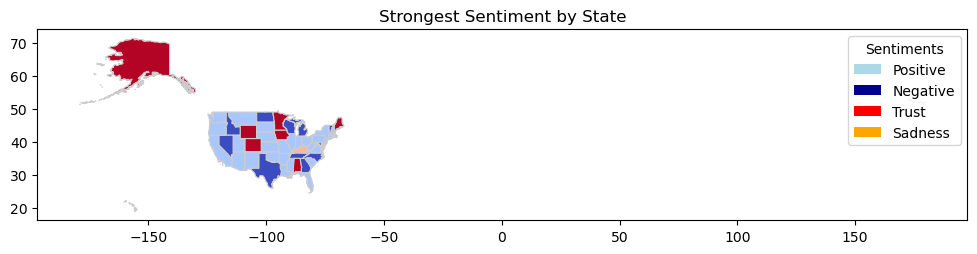

In [22]:
from matplotlib.patches import Patch
# Merge sentiment data with US map data
merged_data = us_map.merge(agg_us_scores_df, how='left', left_on='NAME', right_on='user_location')
merged_data
# Plot the US map with labeled states
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='strongest_sentiment', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

color_map = {
    'Positive': 'lightblue',
    'Negative': 'darkblue',
    'Trust': 'red',
    'Sadness': 'orange'
}

# Add legend
legend_elements = [Patch(facecolor=color_map[sentiment], label=sentiment) for sentiment in color_map]
ax.legend(handles=legend_elements, title='Sentiments')


ax.set_title('Strongest Sentiment by State')
plt.show()

In [23]:
merged_data

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,user_location,anger,anticip,trust,...,positive,negative,sadness,disgust,joy,anticipation,negative_overall,positive_overall,overall,strongest_sentiment
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",Arizona,0.114036,0.0,0.085088,...,0.159430,0.133965,0.011533,0.001964,0.022626,0.031725,0.293222,0.268417,negative,positive
1,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",Arkansas,0.021970,0.0,0.066064,...,0.151812,0.028840,0.009107,0.000925,0.014321,0.016798,0.077641,0.236827,positive,positive
2,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-120.24848 33.99933, -120.2473...",California,0.027277,0.0,0.115297,...,0.201627,0.122074,0.037427,0.024517,0.020582,0.066109,0.277402,0.354520,positive,positive
3,0400000US08,08,Colorado,,103641.888,"POLYGON ((-107.31779 41.00296, -107.00061 41.0...",Colorado,0.028601,0.0,0.237927,...,0.204377,0.100326,0.051442,0.011075,0.024025,0.058901,0.250346,0.470479,positive,trust
4,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-72.39743 42.03330, -72.19883 42.030...",Connecticut,0.007165,0.0,0.099459,...,0.210038,0.150347,0.063382,0.000882,0.024078,0.046470,0.268245,0.334709,positive,positive
5,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03299 38.83950, -77.03170 38.850...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0400000US13,13,Georgia,,57513.485,"POLYGON ((-84.81048 34.98761, -84.80918 34.987...",Georgia,0.010267,0.0,0.124279,...,0.171858,0.188340,0.066592,0.004930,0.008839,0.066536,0.336665,0.313937,negative,negative
7,0400000US15,15,Hawaii,,6422.628,"MULTIPOLYGON (((-155.77823 20.24574, -155.7727...",Hawaii,0.053922,0.0,0.116728,...,0.177022,0.151675,0.084641,0.053922,0.018321,0.099203,0.443362,0.330453,negative,positive
8,0400000US17,17,Illinois,,55518.930,"POLYGON ((-89.36603 42.50027, -89.36156 42.500...",Illinois,0.032679,0.0,0.140503,...,0.150130,0.082832,0.076252,0.012348,0.053371,0.052985,0.257097,0.349052,positive,positive
9,0400000US18,18,Indiana,,35826.109,"POLYGON ((-84.80412 40.35276, -84.80392 40.310...",Indiana,0.042436,0.0,0.129132,...,0.189190,0.088760,0.042905,0.030484,0.056234,0.072626,0.277211,0.420525,positive,positive


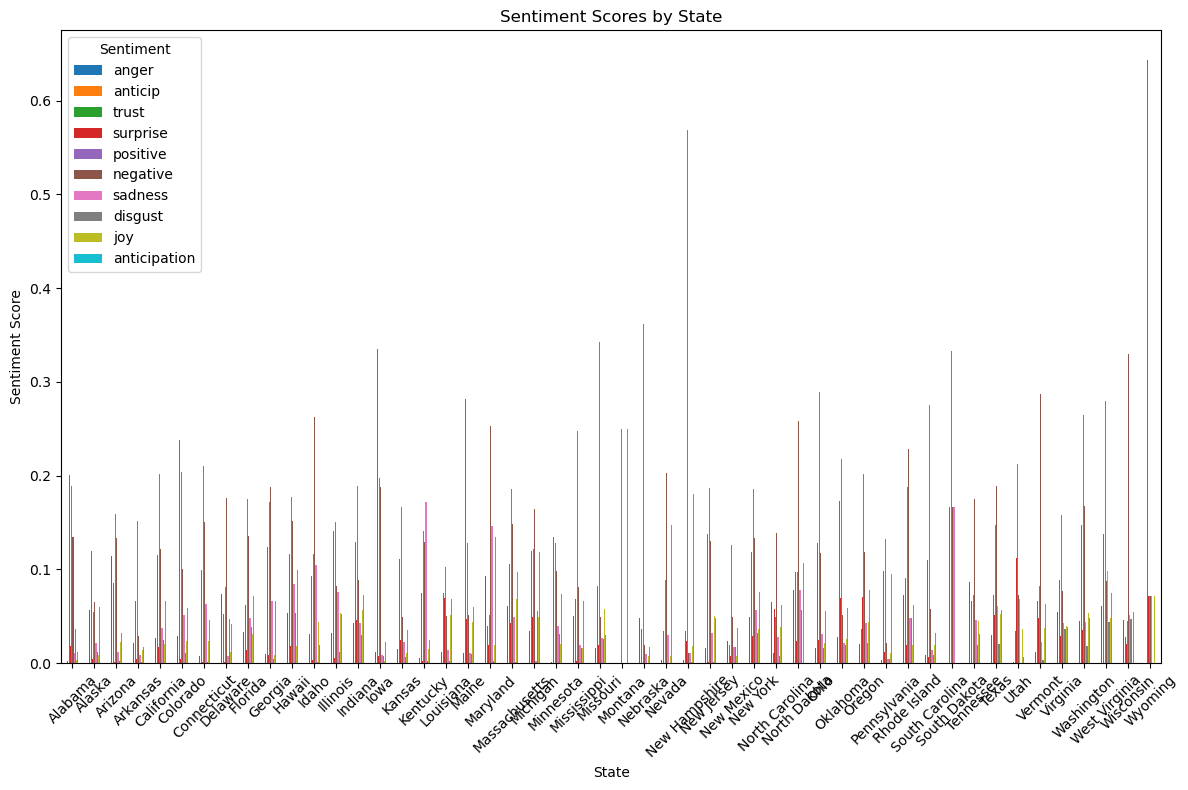

In [24]:
#plot bar graphs by state 


# Plot bar graph by state for sentiment scores
agg_us_scores_df.set_index('user_location')[sentiment_columns].plot(kind='bar', figsize=(12, 8))
plt.title('Sentiment Scores by State')
plt.xlabel('State')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

plt.show()

In [35]:
# Define subsets of states starting from the east coast
subset_states_list = [
    ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island'],
    ['Connecticut', 'New York', 'New Jersey', 'Pennsylvania', 'Delaware'],
    ['Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina'],
    ['Georgia', 'Florida', 'Alabama', 'Mississippi', 'Tennessee'],
    ['Kentucky', 'Ohio', 'Michigan', 'Indiana', 'Illinois'],
    ['Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'Arkansas'],
    ['Louisiana', 'Texas', 'Oklahoma', 'Kansas', 'Nebraska'],
    ['South Dakota', 'North Dakota', 'Montana', 'Wyoming', 'Colorado'],
    ['New Mexico', 'Arizona', 'Utah', 'Idaho', 'Nevada'],
    ['Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
]

# Legend labels
legend_labels = {
    'Anger': 'Anger',
    'Negative': 'Negative',
    'Positive': 'Positive',
    'Joy': 'Joy',
    'Trust': 'Trust',
    'Anticipation': 'Anticipation'
}
color_map = {
    'Negative': 'red',
    'Positive': 'blue'
}

# Loop through each subset and create choropleth maps
for i, subset_states in enumerate(subset_states_list):
    sub_gdf = us_map[us_map['NAME'].isin(subset_states)]
    merged_data_subset = pd.merge(sub_gdf, agg_us_scores_df[agg_us_scores_df['user_location'].isin(subset_states)], left_on='NAME', right_on='user_location', how='left')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data_subset.plot(column='overall', cmap=, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.title(f"Strongest Sentiment by Region (Subset {i+1})")
    ax.legend(title='Sentiment', loc='upper left', labels=[legend_labels])

    for index, row in sub_gdf.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        state_name = row['NAME']  # Assuming your GeoJSON attribute is 'state_name'
        ax.text(x, y, state_name, fontsize=10, ha='center', va='center')

    ax.set_axis_off()

    # Show the plot or save it to a file
    plt.show()

ValueError: {'Negative': 'red', 'Positive': 'blue'} is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [ ]:

# Group states in subsets of 5
subset_size = 5
num_subsets = len(agg_us_scores_df) // subset_size

for i in range(num_subsets):
    subset_start = i * subset_size
    subset_end = (i + 1) * subset_size
    subset_data = agg_us_scores_df.iloc[subset_start:subset_end]

    # Create a bar plot for the subset of states
    plt.figure(figsize=(12, 8))
    subset_data.set_index('user_location')[sentiment_columns].plot(kind='bar', ax=plt.gca())
    plt.title(f'Sentiment Scores by State (Subset {i+1})')
    plt.xlabel('State')
    plt.ylabel('Sentiment Score')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()

    plt.show()